In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 불러오기
data = pd.read_csv("machine.data_update.csv")

#데이터 탐색
print(data.head())
print(data.info())
print(data.describe())

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

In [17]:
# 필요없는 열 제거
data = data.drop(["VendorName", "ModelName"], axis=1)

# 결측값 확인
print(data.isnull().sum())


MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64


In [18]:
# 데이터 분리
X = data.drop("PRP", axis=1)
y = data["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 파이프라인 설정
pipeline = Pipeline([
    ('scaler', StandardScaler()), # 스케일링 포함
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # 다항 특성 추가
    ('model', LinearRegression())
])

# 허아포퍼러마토 그리드 설정
param_grid = {
    'poly__degree': [1, 2, 3], # 다항 회귀 차수
    'model': [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor()]
}

In [20]:
#그리드 서치 설정
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델과 파라미터
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R^2: {grid_search.best_score_}")

Best parameters: {'model': Lasso(), 'poly__degree': 1}
Best cross-validation R^2: 0.8505669271368197


In [21]:
# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [22]:
# 학습 데이터에 대한 평가
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Evaluation:")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R^2 Score: {r2_train}")

# 테스트 데이터에 대한 평가
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Evaluation:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R^2 Score: {r2_test}")

# 교차 검증 점수 (학습 데이터에서 최적 모델로 평가)
cv_scores_mse = cross_val_score(best_model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # Negative MSE를 양수로 변환

cv_scores_mae = cross_val_score(best_model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_scores_mae = -cv_scores_mae  # Negative MAE를 양수로 변환

cv_scores_r2 = cross_val_score(best_model, X, y, cv=10, scoring='r2')

print(f"Cross-validation MSE Scores: {cv_scores_mse}")
print(f"Mean CV MSE Score: {cv_scores_mse.mean()}")

print(f"Cross-validation MAE Scores: {cv_scores_mae}")
print(f"Mean CV MAE Score: {cv_scores_mae.mean()}")

print(f"Cross-validation R^2 Scores: {cv_scores_r2}")
print(f"Mean CV R^2 Score: {cv_scores_r2.mean()}")

Training Set Evaluation:
Mean Squared Error: 1556.3120620887519
Mean Absolute Error: 23.253550291629363
R^2 Score: 0.9190451752348254
Test Set Evaluation:
Mean Squared Error: 2023.911810455031
Mean Absolute Error: 29.983379866338478
R^2 Score: 0.9602428418917723
Cross-validation MSE Scores: [ 3415.85844212  5466.48444958   418.9447742    825.63615216
  2268.63068455    57.94114889   657.96615505  2662.06248543
  1811.4622888  10413.24809888]
Mean CV MSE Score: 2799.8234679654656
Cross-validation MAE Scores: [39.38964977 39.42328783 14.89358858 17.57369072 31.06372248  6.20661417
 20.27402325 40.16951847 21.75188451 50.91505167]
Mean CV MAE Score: 28.166103145200587
Cross-validation R^2 Scores: [0.95116752 0.31153336 0.51874278 0.74101678 0.87877951 0.93843919
 0.02369055 0.88925942 0.28721531 0.88225934]
Mean CV R^2 Score: 0.6422103748520479


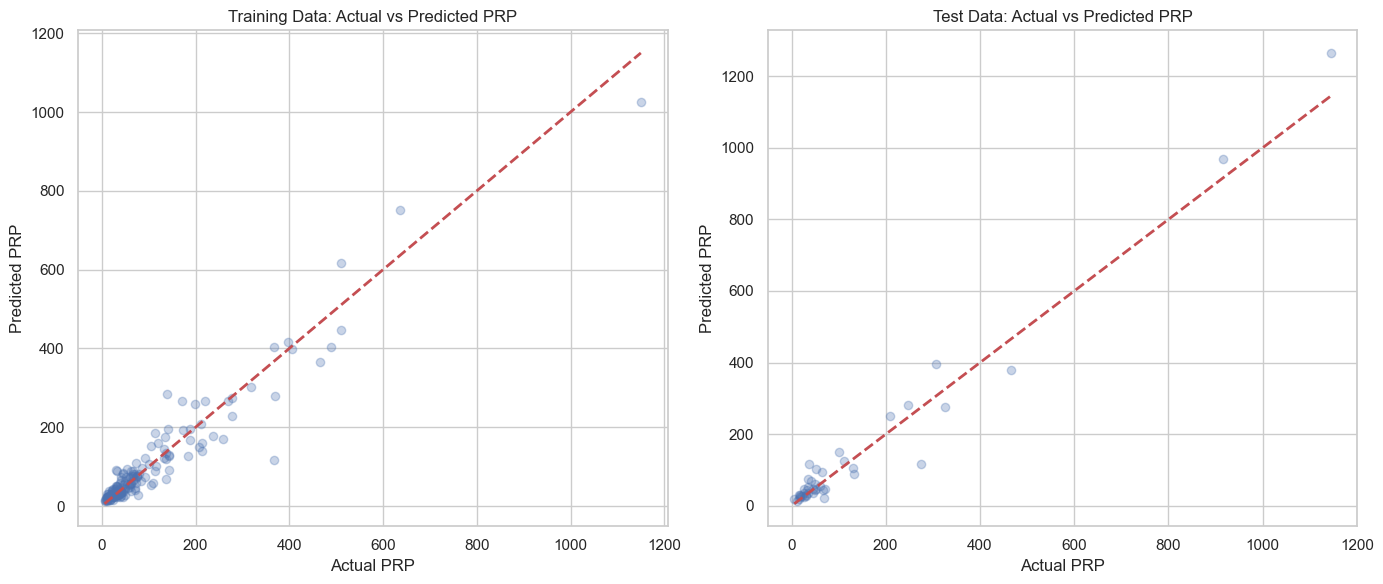

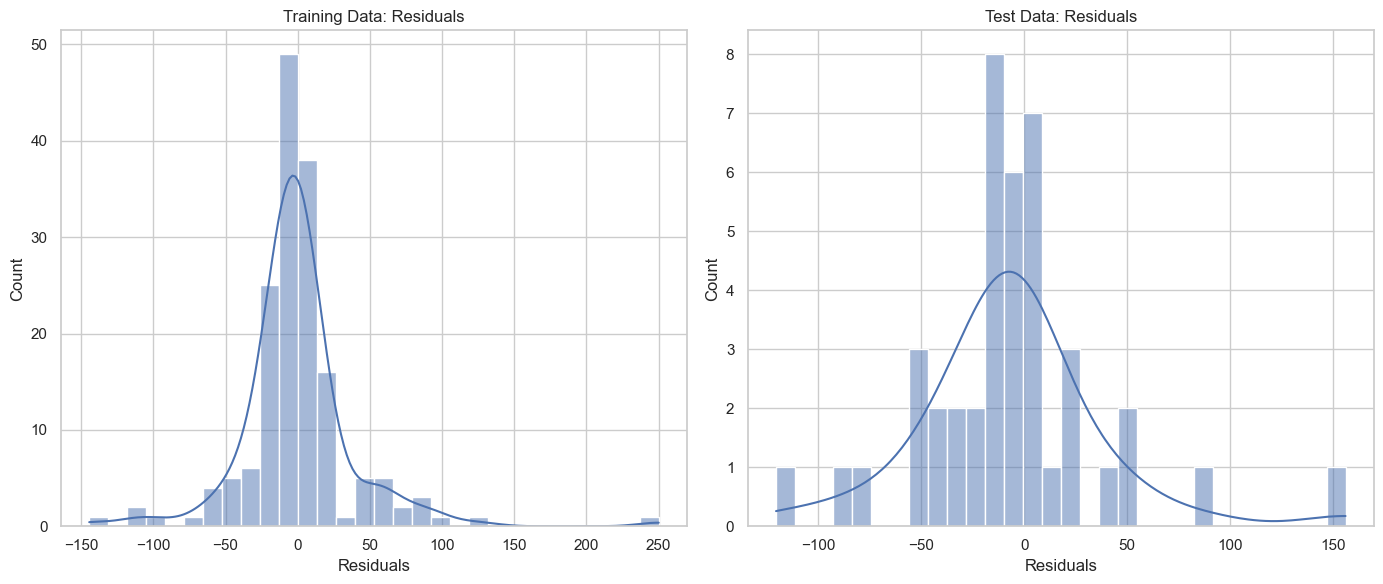

In [23]:
# 시각화를 위해 seaborn 스타일 사용
sns.set(style="whitegrid")

# 학습 데이터에 대한 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Training Data: Actual vs Predicted PRP')

# 테스트 데이터에 대한 실제 값과 예측 값 비교 시각화
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Test Data: Actual vs Predicted PRP')

plt.tight_layout()
plt.show()

# 학습 데이터와 테스트 데이터에 대한 잔차(오차) 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train - y_train_pred, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Training Data: Residuals')

plt.subplot(1, 2, 2)
sns.histplot(y_test - y_test_pred, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Test Data: Residuals')

plt.tight_layout()
plt.show()

               Model              Data          MSE        MAE       R^2
0  Linear Regression             Train     0.059396   0.144798  0.920465
1  Linear Regression              Test     0.092068   0.195744  0.953442
2     Best_estimator             Train  1556.312062  23.253550  0.919045
3     Best_estimator              Test  2023.911810  29.983380  0.960243
4  Linear Regression  Cross Validation     0.117624   0.182063  0.630844
5     Best_estimator  Cross Validation  2799.823468  28.166103  0.642210


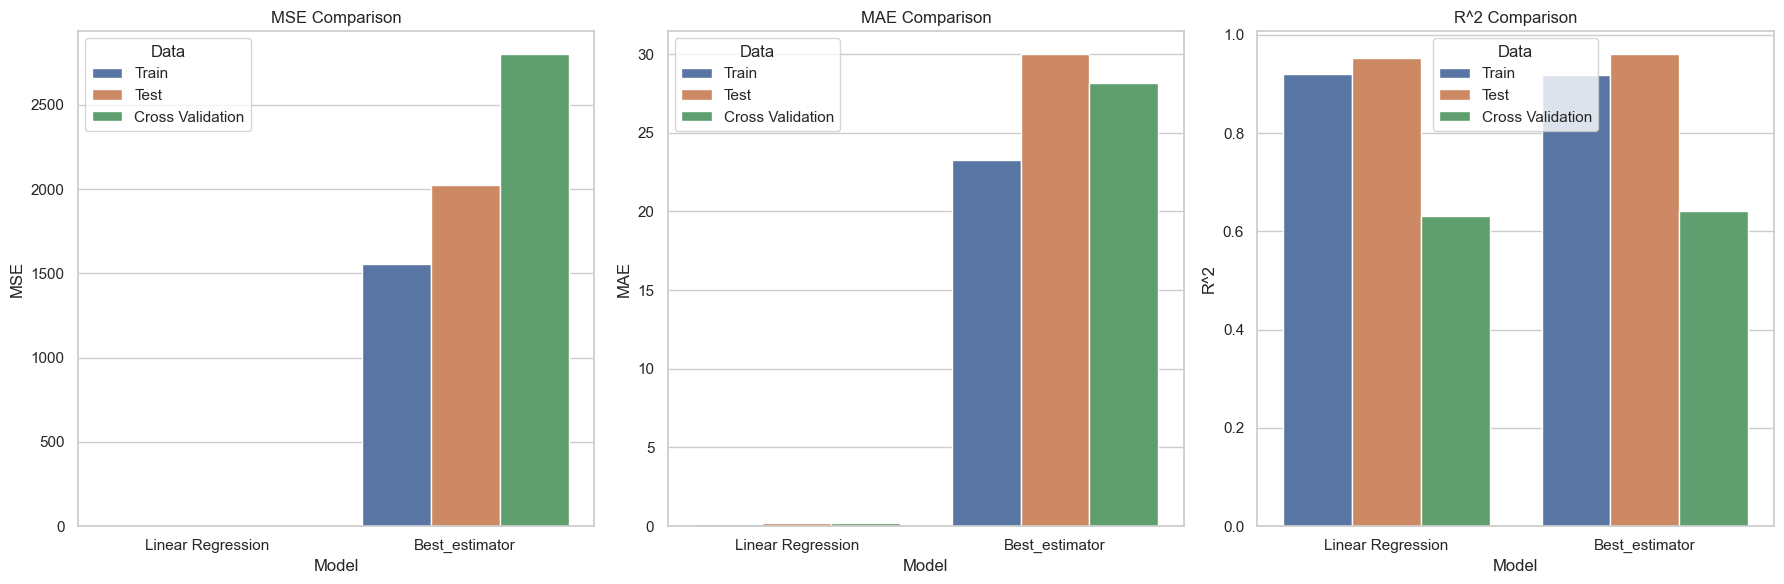

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 성능 지표
first_model_metrics = {
    'MSE': [0.05939613256881661, 0.09206845898295865, 0.11762359561188736],
    'MAE': [0.14479841721539094, 0.19574383121008587, 0.18206304600805118],
    'R^2': [0.9204648044109383, 0.9534424890368547, 0.6308442045473646]
}

second_model_metrics = {
    'MSE': [1556.3120620887519, 2023.911810455031, 2799.8234679654656],
    'MAE': [23.253550291629363, 29.983379866338478, 28.166103145200587],
    'R^2': [0.9190451752348254, 0.9602428418917723, 0.6422103748520479]
}

# 데이터프레임 생성
metrics_data = {
    'Model': ['Linear Regression', 'Linear Regression', 'Best_estimator', 'Best_estimator', 'Linear Regression', 'Best_estimator'],
    'Data': ['Train', 'Test', 'Train', 'Test', 'Cross Validation', 'Cross Validation'],
    'MSE': [first_model_metrics['MSE'][0], first_model_metrics['MSE'][1], second_model_metrics['MSE'][0], second_model_metrics['MSE'][1], first_model_metrics['MSE'][2], second_model_metrics['MSE'][2]],
    'MAE': [first_model_metrics['MAE'][0], first_model_metrics['MAE'][1], second_model_metrics['MAE'][0], second_model_metrics['MAE'][1], first_model_metrics['MAE'][2], second_model_metrics['MAE'][2]],
    'R^2': [first_model_metrics['R^2'][0], first_model_metrics['R^2'][1], second_model_metrics['R^2'][0], second_model_metrics['R^2'][1], first_model_metrics['R^2'][2], second_model_metrics['R^2'][2]]
}

metrics_df = pd.DataFrame(metrics_data)

# 데이터프레임 출력
print(metrics_df)

# 시각화 설정
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MSE 비교
sns.barplot(x='Model', y='MSE', hue='Data', data=metrics_df, ax=axes[0])
axes[0].set_title('MSE Comparison')

# MAE 비교
sns.barplot(x='Model', y='MAE', hue='Data', data=metrics_df, ax=axes[1])
axes[1].set_title('MAE Comparison')

# R^2 비교
sns.barplot(x='Model', y='R^2', hue='Data', data=metrics_df, ax=axes[2])
axes[2].set_title('R^2 Comparison')

plt.tight_layout()
plt.show()
